In [102]:
# 1. Import Libraries

#provides data structures like DataFrames, which are great for handling and analyzing structured data (like tables).
import pandas as pd

# numerical computing in Python
import numpy as np

#plotting library for creating static, interactive, and animated visualizations in Python.
import matplotlib.pyplot as plt

#built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

#used to split your dataset into training and testing subsets.
from sklearn.model_selection import train_test_split

#perform linear regression analysis to predict a target variable based on input features
from sklearn.linear_model import LinearRegression

#r2_score:Measures how well the model’s predictions match the actual data
#mean_absolute_error:Calculates the average absolute difference between the predicted and actual values
#mean_sqaures_error:Calculates the average of the squares of the differences between predicted and actual values, emphasizing larger errors.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#This is important when features are on different scales, as it ensures that they contribute equally to the distance calculations in algorithms.
from sklearn.preprocessing import StandardScaler

#improving code organization and clarity.
from sklearn.pipeline import make_pipeline

#systematically tests different combinations of hyperparameters to find the best model configuration
from sklearn.model_selection import GridSearchCV

In [103]:
# 2. Load the Data
file_path = r"C:\Users\heebs\Downloads\HealthCareDataSet - Sheet1.csv"
data = pd.read_csv(file_path)

In [104]:
# 3. Standardize Column Names
# strip():removing heading and trailing spaces
# lower (): all the column names to lower case
# replace():repacing spaces in colums to _
data.columns = [col.strip().lower().replace(' ', '_') for col in data.columns]

In [105]:
# 4. Define Features and Target Variable
target_column = 'lengthofstay'
X = data.drop(columns=[target_column])
y = data[target_column]

In [106]:
# 5. Handle Missing Values
X.fillna(X.mean(numeric_only=True), inplace=True)  # Fill numeric columns with mean
for col in X.select_dtypes(exclude='number').columns:
    X[col].fillna(X[col].mode()[0], inplace=True)  # Fill categorical columns with mode

In [107]:
# 6. One-Hot Encode Categorical Variables (technique used to convert categorical variables into a numerical format)
categorical_columns = ['gender', 'kidneyailments', 'heartailments', 'psychologicalailments', 'substanceabusehistory']
valid_categorical_columns = [col for col in categorical_columns if col in X.columns]
X = pd.get_dummies(X, columns=valid_categorical_columns, drop_first=True)


In [108]:
#Descriptive statistics 
descriptive_stats = data.describe().T[['mean', '50%', 'min', 'max', 'std']]
descriptive_stats.rename(columns={'50%': 'median'}, inplace=True)

#outliers identified 
outliers = {}
for column in descriptive_stats.index:
    mean = descriptive_stats.loc[column, 'mean']
    std = descriptive_stats.loc[column, 'std']
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]


In [109]:
# Descriptive statistics for numeric columns
#data.describe()

In [110]:
# 7. Split the Data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# 8. Model Training (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [112]:
# 9. Model Evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [113]:
# Calculate metrics
def calculate_metrics(y_true, y_pred):
    return {
        'r2_score': r2_score(y_true, y_pred),
        'mae': mean_absolute_error(y_true, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred))
    }

train_metrics = calculate_metrics(y_train, y_train_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)

In [114]:
# 10. Print Results
print("Training R-squared:", train_metrics['r2_score'])
print("Test R-squared:", test_metrics['r2_score'])
print("Training MAE:", train_metrics['mae'])
print("Test MAE:", test_metrics['mae'])
print("Training RMSE:", train_metrics['rmse'])
print("Test RMSE:", test_metrics['rmse'])

Training R-squared: 0.5799653505810404
Test R-squared: 0.5784345297843354
Training MAE: 1.2923911189620898
Test MAE: 1.33760882867565
Training RMSE: 2.136115972855109
Test RMSE: 2.162031923810298


In [115]:
# 11. Model Tuning with Cross-Validation
# Define the pipeline
#pipeline = make_pipeline(StandardScaler(), LinearRegression())
#param_grid = {
#    'linearregression__fit_intercept': [True, False]
#}
#grid_search = GridSearchCV(pipeline, param_grid, cv=5)
#grid_search.fit(X_train, y_train)

In [116]:
# 13. Evaluate Tuned Model
#y_train_tuned_pred = grid_search.predict(X_train)
#y_test_tuned_pred = grid_search.predict(X_test)

In [121]:
# 14. Results of Tuned Model
#print("Tuned Training R-squared:", train_metrics_tuned['r2_score'])
#print("Tuned Test R-squared:", test_metrics_tuned['r2_score'])
#print("Tuned Training MAE:", train_metrics_tuned['mae'])
#print("Tuned Test MAE:", test_metrics_tuned['mae'])
#print("Tuned Training RMSE:", train_metrics_tuned['rmse'])
#print("Tuned Test RMSE:", test_metrics_tuned['rmse'])

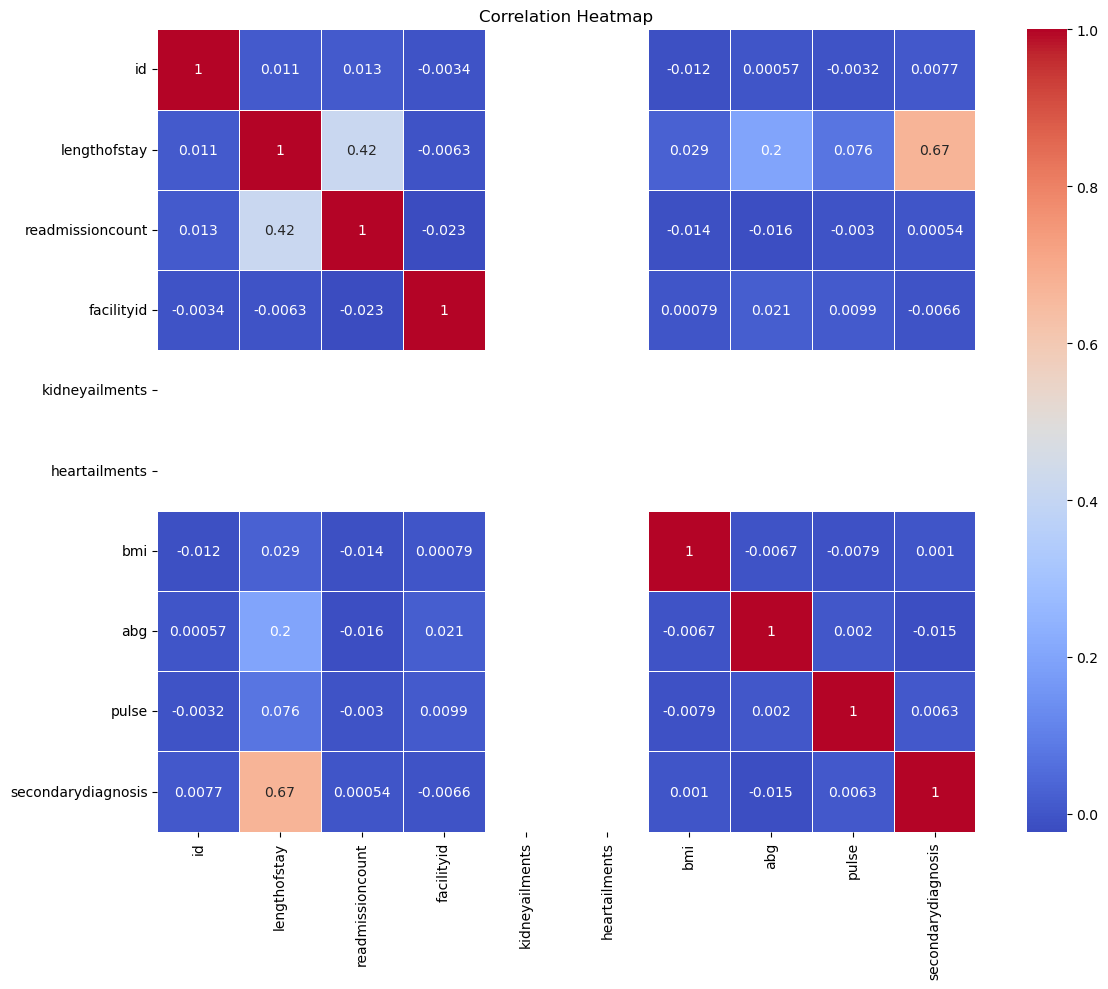

In [123]:
# 15. Visualizations

#15.1 Correlation analysis
numeric_columns = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()





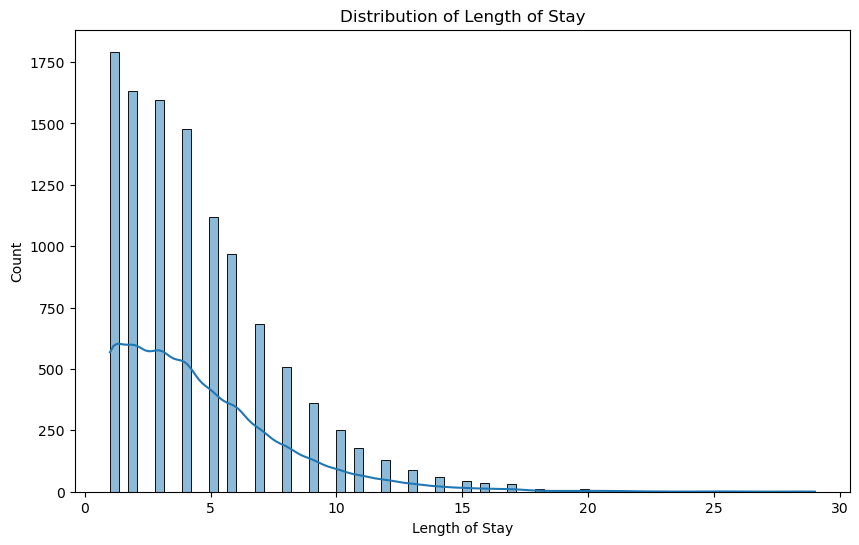

In [98]:
# 15.2 Distribution of target variable (LengthOfStay)
plt.figure(figsize=(10, 6))
sns.histplot(data['lengthofstay'], kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Count')
plt.show()

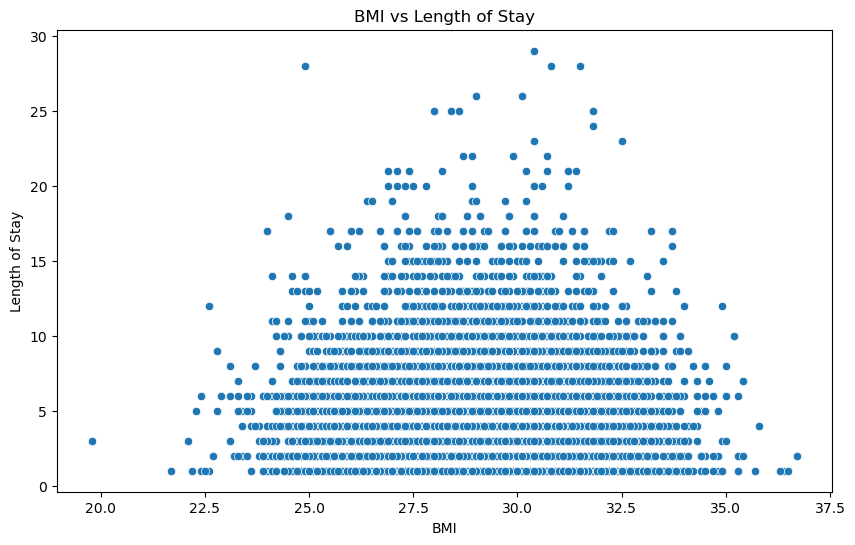

In [99]:
# 15.3 Relationship between BMI and Length of Stay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='lengthofstay', data=data)
plt.title('BMI vs Length of Stay')
plt.xlabel('BMI')
plt.ylabel('Length of Stay')
plt.show()

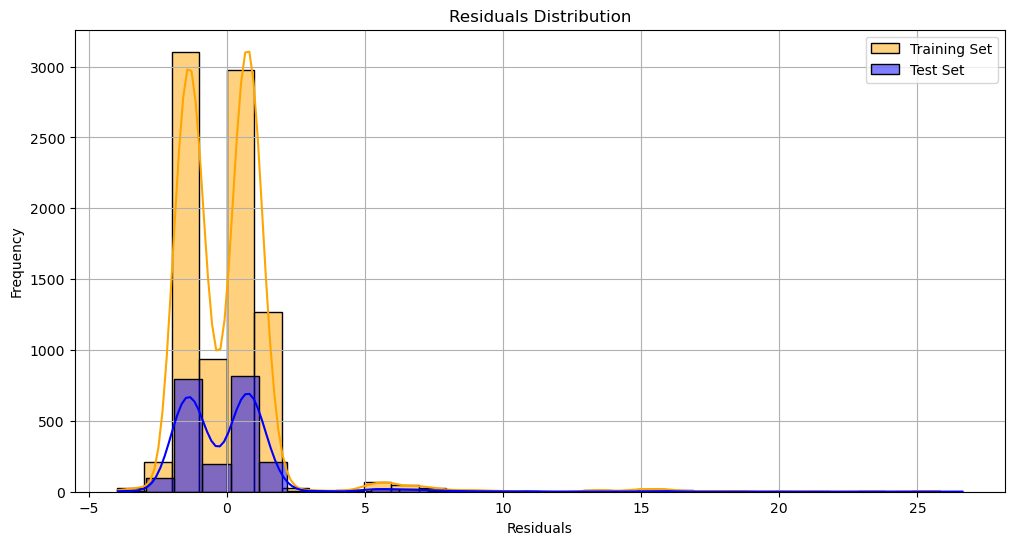

In [124]:
# 15.4 Residual Plot
plt.figure(figsize=(12, 6))
sns.histplot(y_train - y_train_pred, kde=True, color='orange', bins=30, label='Training Set')
sns.histplot(y_test - y_test_pred, kde=True, color='blue', bins=30, label='Test Set', alpha=0.5)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

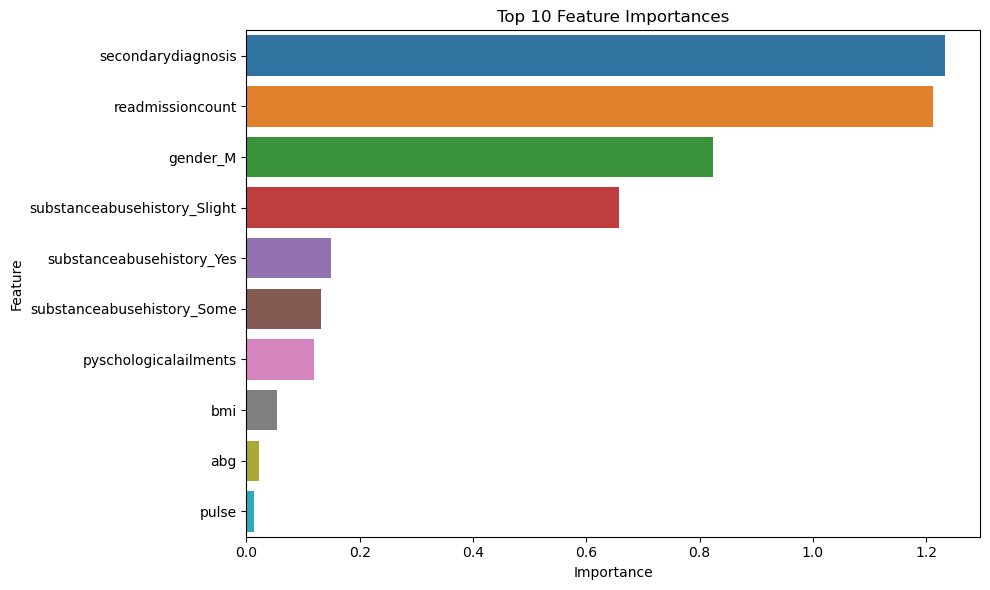

In [125]:
# 15.5 Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()